In [93]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
#Readind the  Data
data=pd.read_csv("advertising.csv")

In [95]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [96]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [98]:
# check for missing value
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [99]:
# check stastical summary
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [100]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

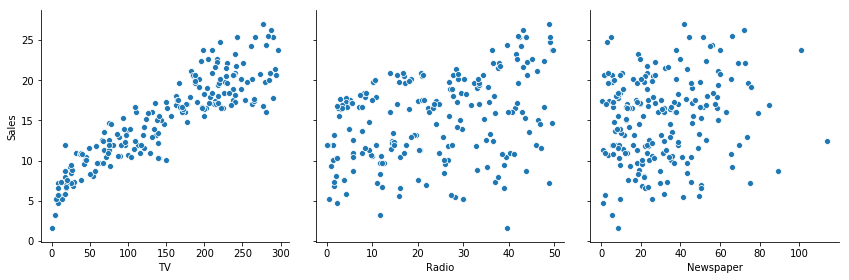

In [101]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales', height= 4 , aspect=1 , kind='scatter')
plt.show()

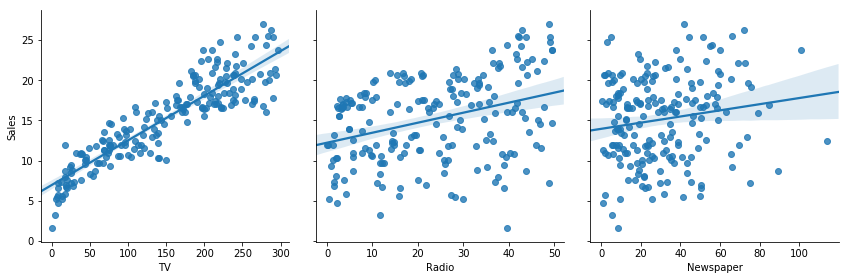

In [102]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales', height= 4 , aspect=1 , kind='reg')
plt.show()

In [103]:
# The diagonal of the above matirx shows the auto-correlation of the variables. 
# It is always 1. 

# observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and 
# then betweeb sales and radio i.e. 0.576.

# correlations can vary from -1 to +1. 
# Closer to +1 means strong positive correlation and close -1 means strong negative correlation. 
# Closer to 0 means not very strongly correlated. 

# variables with strong correlations are mostly probably candidates for model builing.**
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


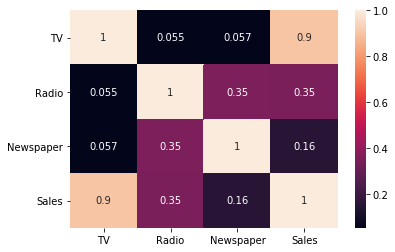

In [104]:
sns.heatmap(data.corr(),annot= True)
plt.show()

In [105]:
# use the list to select a subset of the original DataFrame
X = data['TV']

# select a Series from the DataFrame
y = data['Sales']

In [106]:
# Reshape the data
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [107]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, test_size=0.2 , random_state=200)

In [109]:
#### Scikit learn package

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()

In [112]:
# fit the model to the training data (learn the coefficients)
model=lr.fit(X_train, y_train)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [113]:
# print the coefficients
print(model.intercept_)
print(model.coef_)

[7.23998683]
[[0.05377005]]


#### Interpreting the  coefficient

$$y = 7.23 + 0.0537 \times TV $$

##### 0.0466 * TV - per unit increase in TV spend will lead to  increase in sales

#For a given amount of TV/Radio/Newspaper ad spending, ($1000) being a large market is associated with an average increase in Sales of 57.42 widgets (as compared to a small market, which is called the baseline level).

In [114]:
# Making predictions
# make predictions on the testing set
y_pred = model.predict(X_test)

In [115]:
y_pred

array([[ 8.25086369],
       [22.52681075],
       [15.28936263],
       [11.92873479],
       [21.59121196],
       [13.01488971],
       [ 7.94975143],
       [ 7.27762587],
       [17.65524463],
       [19.58021226],
       [ 7.53034508],
       [19.19844493],
       [ 8.6165    ],
       [ 9.36390363],
       [17.34337837],
       [12.2889941 ],
       [13.99888154],
       [ 7.70778623],
       [12.4126652 ],
       [15.16031452],
       [20.31686188],
       [18.98874176],
       [19.84906248],
       [20.15017474],
       [ 8.77781013],
       [10.96087398],
       [16.39164856],
       [ 8.16483161],
       [20.97285643],
       [ 8.58961497],
       [16.75728487],
       [19.49955719],
       [14.19783071],
       [22.81716899],
       [18.78441558],
       [18.94572572],
       [13.54183616],
       [18.57471241],
       [11.27811724],
       [ 8.1487006 ]])

In [116]:
y_test

array([[ 7. ],
       [20. ],
       [17.3],
       [10.6],
       [25.4],
       [11.5],
       [ 5.6],
       [ 1.6],
       [19.2],
       [19.7],
       [ 5.3],
       [16.7],
       [ 9.5],
       [10.8],
       [19.7],
       [15.3],
       [15.9],
       [ 7.2],
       [12.3],
       [14.6],
       [25.4],
       [17.2],
       [16.9],
       [18.2],
       [ 7.3],
       [11.3],
       [16.7],
       [ 5.9],
       [19.8],
       [ 8.5],
       [17.1],
       [21.5],
       [11. ],
       [25.4],
       [17.4],
       [19.4],
       [11.9],
       [23.8],
       [12.6],
       [ 8.7]])

In [117]:
# pair the feature names with the coefficients
list(zip(y_test, y_pred))

[(array([7.]), array([8.25086369])),
 (array([20.]), array([22.52681075])),
 (array([17.3]), array([15.28936263])),
 (array([10.6]), array([11.92873479])),
 (array([25.4]), array([21.59121196])),
 (array([11.5]), array([13.01488971])),
 (array([5.6]), array([7.94975143])),
 (array([1.6]), array([7.27762587])),
 (array([19.2]), array([17.65524463])),
 (array([19.7]), array([19.58021226])),
 (array([5.3]), array([7.53034508])),
 (array([16.7]), array([19.19844493])),
 (array([9.5]), array([8.6165])),
 (array([10.8]), array([9.36390363])),
 (array([19.7]), array([17.34337837])),
 (array([15.3]), array([12.2889941])),
 (array([15.9]), array([13.99888154])),
 (array([7.2]), array([7.70778623])),
 (array([12.3]), array([12.4126652])),
 (array([14.6]), array([15.16031452])),
 (array([25.4]), array([20.31686188])),
 (array([17.2]), array([18.98874176])),
 (array([16.9]), array([19.84906248])),
 (array([18.2]), array([20.15017474])),
 (array([7.3]), array([8.77781013])),
 (array([11.3]), array(

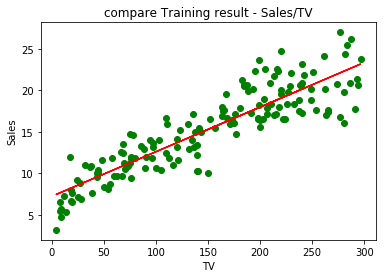

In [132]:

# let us visualize the Training set

plt.scatter(X_train, y_train, color = 'green')
plt.plot (X_train, model.predict (X_train), color = 'red')
plt.title ('compare Training result - Sales/TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

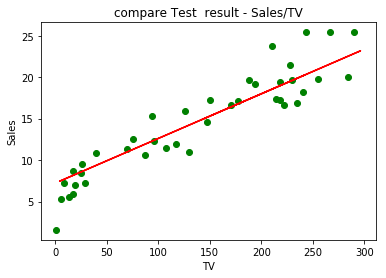

In [133]:
#  let us visualize the Test set
plt.scatter(X_test, y_test, color = 'green')
plt.plot (X_train, model.predict (X_train), color = 'red')
plt.title ('compare Test  result - Sales/TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [118]:
from sklearn import metrics

In [119]:
# Model evaluation metrics for regression

print('y-intercept             : ', model.intercept_)
print('beta coefficients       : ', model.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  [7.23998683]
beta coefficients       :  [[0.05377005]]
Mean Abs Error   MAE    :  1.843926655905299
Mean Sq  Error MSE      :  5.230749582503959
Root Mean Sq Error RMSE :  2.287083204106042
r2 value                :  0.855532489967328


In [120]:
# R-squared is a statistical measure of how close the data are to the fitted regression line.
# R-square signifies percentage of variations in the reponse variable that can be explained 
# by the model.
# R-squared = Explained variation / Total variation

# Total variation is variation of response variable around it's mean.
# R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the 
# variability, while 100% signifies that the model explains all the variability of the response. 
# The closer the r-square to 100%, the better is the model.

In [121]:
# How do we interpret the TV coefficient (0.0466)?

# For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending 
# is associated with a 0.0466 "unit" increase in Sales.

# Important notes:

# This is a statement of association, not causation.

# If an increase in TV ad spending was associated with a decrease in sales, 
# beta_1 would be negative.

In [122]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [123]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))
print(metrics.mean_absolute_error(y_test, y_pred))

10.0
10.0
1.843926655905299


In [124]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

150.0
5.230749582503959


In [126]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.24744871391589
2.287083204106042


In [127]:
# Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.287083204106042


In [ ]:
----------------------------------------------------------------------------------------------------

In [ ]:
# Transform the data

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
y_train_scaled=scaler.fit_transform(y_train)

In [ ]:
model=lr.fit(X_train_scaled, y_train_scaled)

In [ ]:
model

In [ ]:
print(model.intercept_)

In [ ]:
print(model.coef_)

#### The equation of best fit line

#### Sales=7.23+0.053*STUDENTS

In [ ]:
preds =model.predict(X_test)
preds

In [ ]:
# Model evaluation metrics for regression

print('y-intercept             : ', model.intercept_)
print('beta coefficients       : ', model.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value                : ', metrics.r2_score(y_test, y_pred))